In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## 1. Sex

### 1.1 Baseline FPR Sex

In [2]:
baseline_sex_fpr=pd.read_csv('./Baseline_FPR/baseline_sex_fpr.csv')
baseline_sex_fpr.set_index('index', inplace=True)
baseline_sex_fpr


,FPR_M,FPR_F
index,,
mean,0.093400,0.100800
std,0.006309,0.006419


In [3]:
sex = ['M', 'F']
FPR = baseline_sex_fpr.loc['mean'][['FPR_M', 'FPR_F']].values
CI = 1.96 * baseline_sex_fpr.loc['std'][['FPR_M', 'FPR_F']].values / np.sqrt(5)

baseline_sex_df = pd.DataFrame({
    "sex": sex,
    "FPR": FPR,
    "CI_FPR": CI
})
baseline_sex_df

,sex,FPR,CI_FPR
0,M,0.0934,0.005530
1,F,0.1008,0.005626


### 1.2 BiomedClip FPR  Sex

In [4]:
biomedclip_sex_df=pd.read_csv("./FPR/Subgroup_FPR_Sex.csv")
biomedclip_sex_df=biomedclip_sex_df[["sex","FPR","CI_FPR"]]
biomedclip_sex_df

,sex,FPR,CI_FPR
0,M,0.116,0.012
1,F,0.101,0.010


### 1.3 CXR FPR Sex

In [5]:
cxr_sex_df=pd.read_csv("./CXR_Foundation/Subgroup_FNR_FPR_Sex.csv")
cxr_sex_df=cxr_sex_df[["sex","FPR","CI_FPR"]]
cxr_sex_df

,sex,FPR,CI_FPR
0,M,0.051,0.004
1,F,0.060,0.004


## 2. Age

### 2.1 Baseline FPR Age

In [6]:
F_age_df=pd.read_csv('./Baseline_FPR/baseline_age_fpr.csv')
F_age_df.set_index('index', inplace=True)

ages = ['0-20','20-40','40-60','60-80','80-']
FPR = [F_age_df.loc['mean']['FPR_0-20'],F_age_df.loc['mean']['FPR_20-40'],
       F_age_df.loc['mean']['FPR_40-60'],F_age_df.loc['mean']['FPR_60-80'],
       F_age_df.loc['mean']['FPR_80-']]

CI = 1.96 * F_age_df.loc['std'] / np.sqrt(5)
error = [CI['FPR_0-20'],CI['FPR_20-40'],CI['FPR_40-60'],
         CI['FPR_60-80'],CI['FPR_80-']]

baseline_age_df = pd.DataFrame({
    "Age": ages,
    "FPR": FPR,
    "CI_FPR": error
})
baseline_age_df["Age"].replace("80-","80+",inplace=True)
baseline_age_df

C:\Users\gebre\AppData\Local\Temp\ipykernel_27484\3246907081.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  baseline_age_df["Age"].replace("80-","80+",inplace=True)


,Age,FPR,CI_FPR
0,0-20,0.1642,0.018691
1,20-40,0.2056,0.010438
2,40-60,0.1344,0.006721
3,60-80,0.0690,0.005035
4,80+,0.0190,0.003667


### 2.2 BiomedClip FPR Age

In [7]:
biomedclip_age_df = pd.read_csv("./FPR/Subgroup_FPR_Age.csv")
biomedclip_age_df.rename(columns={"age":"Age"},inplace=True)
biomedclip_age_df=biomedclip_age_df[["Age","FPR","CI_FPR"]]
biomedclip_age_df

,Age,FPR,CI_FPR
0,0-20,0.284,0.028
1,20-40,0.194,0.012
2,40-60,0.148,0.014
3,60-80,0.085,0.011
4,80+,NaN,NaN


### 2.3 CXR FPR  Age

In [8]:
cxr_age_df=pd.read_csv('./CXR_Foundation/Subgroup_FNR_FPR_Age.csv')
cxr_age_df=cxr_age_df[["Age","FPR","CI_FPR"]]
cxr_age_df

,Age,FPR,CI_FPR
0,0-20,0.073,0.008
1,20-40,0.068,0.004
2,40-60,0.061,0.004
3,60-80,0.048,0.004
4,80+,0.049,0.008


## 3. Race
### 3.1. Baseline race

In [9]:
baseline_race_df=pd.read_csv("./Baseline_FPR/Subgroup_FPR_Race.csv")
baseline_race_df.drop(columns=['Unnamed: 0'],inplace=True)
baseline_race_df=baseline_race_df[["Race","FPR","CI_FPR"]]
baseline_race_df

,Race,FPR,CI_FPR
0,White,0.085,0.004
1,Black,0.099,0.008
2,Hisp,0.120,0.013
3,Other,0.099,0.005
4,Asian,0.094,0.008
5,American,0.047,0.006


### 3.2. BiomedClip Race

In [10]:
biomedclip_race_df =pd.read_csv("./FPR/Subgroup_FPR_Race.csv")
biomedclip_race_df.rename(columns={"race":"Race"},inplace=True)
biomedclip_race_df=biomedclip_race_df[["Race","FPR","CI_FPR"]]
biomedclip_race_df

,Race,FPR,CI_FPR
0,White,0.103,0.012
1,Black,0.129,0.014
2,Hisp,0.094,0.007
3,Other,0.139,0.013
4,Asian,0.121,0.013
5,American,0.119,0.014


### 3.3. CXR FPR Race

In [11]:
cxr_race_df=pd.read_csv('./CXR_Foundation/Subgroup_FNR_FPR_Race.csv')
cxr_race_df.drop(columns=['Unnamed: 0'],inplace=True)
cxr_race_df=cxr_race_df[["Race","FPR","CI_FPR"]]
cxr_race_df

,Race,FPR,CI_FPR
0,White,0.053,0.004
1,Black,0.072,0.007
2,Hisp,0.052,0.005
3,Other,0.068,0.005
4,Asian,0.059,0.006
5,American,0.112,0.007


In [12]:
fontsize = 11
font_name='Times New Roman'
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [13]:
baseline_race_df["Race"].replace("American","Native",inplace=True)
biomedclip_race_df["Race"].replace("American","Native",inplace=True)
cxr_race_df["Race"].replace("American","Native",inplace=True)

C:\Users\gebre\AppData\Local\Temp\ipykernel_27484\1096275292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  baseline_race_df["Race"].replace("American","Native",inplace=True)
C:\Users\gebre\AppData\Local\Temp\ipykernel_27484\1096275292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

C:\Users\gebre\AppData\Local\Temp\ipykernel_27484\1207537963.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels,fontsize = fontsize,fontname=font_name)


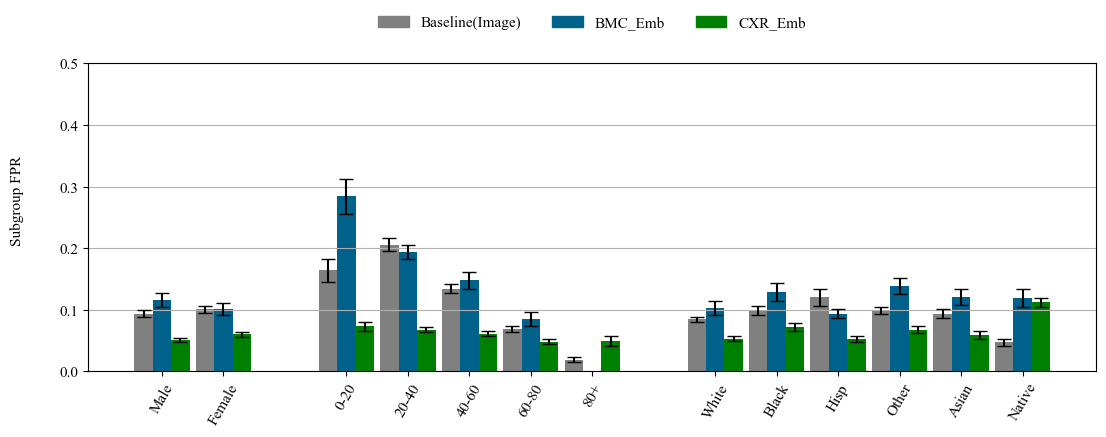

In [14]:

sex_labels = ['Male', 'Female']
age_labels = ['0-20', '20-40', '40-60', '60-80', '80+']
race_labels = ['White','Black','Hisp','Other','Asian','American']

# Combine all data into a single structure
categories = {
    "Sex": [baseline_sex_df,biomedclip_sex_df,cxr_sex_df],
    "Age": [baseline_age_df,biomedclip_age_df,cxr_age_df],
    "Race": [baseline_race_df,biomedclip_race_df,cxr_race_df]
}
# Plotting all data in one plot
fig1, ax = plt.subplots(figsize=(13,4))
models = ["Baseline Model","BioMedClip Model","CXR Model",]
colors = ['gray','#00618b','green']

x_labels = ['Male','Female']
x_positions = []
width = 0.3 
current_position = 0

#region subgroup FPR

# Define custom legend handles
legend_patches = [
    mpatches.Patch(color='gray', label='Baseline(Image)'),
    mpatches.Patch(color='#00618b', label='BMC_Emb'),
    mpatches.Patch(color='green', label='CXR_Emb')
]

for category, data in categories.items():
    
    category_labels = data[0][data[0].columns[0]].values
    
    if data[0].columns[0]!="sex":
        x_labels.extend(category_labels)
    
    x_positions.extend([current_position + i for i in range(len(category_labels))])

    for i, (model, df, color) in enumerate(zip(models, data, colors)):
        positions = np.array([current_position + j for j in range(len(category_labels))]) + i * width
        ax.bar(positions, df['FPR'], width, label=f'{model} ({category})' if i == 0 else "", color=color,
               yerr=df['CI_FPR'], capsize=5)

    current_position += len(category_labels) + 1  # Add spacing between categories

y_labels = ['0.0', '0.1', '0.2','0.3','0.4','0.5']

# ax.set_ylabel('Subgroup FPR',fontsize = fontsize)
ax.set_xticks([pos + width for pos in x_positions])
ax.set_xticklabels(x_labels,fontsize = fontsize, rotation=60,fontname=font_name)
ax.set_yticklabels(y_labels,fontsize = fontsize,fontname=font_name)

ax.yaxis.grid(True)
ax.set_ylim(top=0.5)

# Adding the legend at the top center side
# Create the legend
legend = ax.legend(handles=legend_patches, loc="upper center",
                   bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=fontsize, frameon=False)
# Manually set font for all legend text
for text in legend.get_texts():
    text.set_fontname('Times New Roman')

fig1.suptitle('Subgroup FPR',rotation=90,x=0.07,y=0.65,fontsize=fontsize,fontname=font_name)

#endregion

#plt.savefig('./Subgroup_FPR_MIMC.pdf',bbox_inches='tight')
plt.savefig('./Subgroup_FPR_Chexpert_BiomedClip.pdf',bbox_inches='tight')

## Two Group FPR

## 1 .Age and Sex
### 1.1. Baseline


In [15]:
baseline_agesex= pd.read_csv('./Baseline_FPR/Inter_FPFN_AgeSex.csv')
baseline_agesex.drop( columns=["Unnamed: 0"],inplace=True)
baseline_agesex["Age"].replace("80-","80+",inplace=True)
baseline_agesex=baseline_agesex[["Age","FPR_M","CI_FPR_M","FPR_F","CI_FPR_F"]]
baseline_agesex

C:\Users\gebre\AppData\Local\Temp\ipykernel_27484\502778215.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  baseline_agesex["Age"].replace("80-","80+",inplace=True)


,Age,FPR_M,CI_FPR_M,FPR_F,CI_FPR_F
0,0-20,0.202,0.023,0.117,0.021
1,20-40,0.188,0.010,0.236,0.011
2,40-60,0.126,0.008,0.146,0.006
3,60-80,0.068,0.005,0.070,0.005
4,80+,0.016,0.002,0.022,0.006


### 1.2. BiomedClip Age and Sex FPR

In [16]:
biomedclip_agesex= pd.read_csv('./FPR/FPR_AgeSex.csv')
biomedclip_agesex

,Age,FPR_F,CI_FPR_F,FPR_M,CI_FPR_M
0,0-20,0.297,0.022,0.278,0.035
1,20-40,0.178,0.015,0.203,0.011
2,40-60,0.148,0.014,0.148,0.015
3,60-80,0.078,0.009,0.091,0.013
4,80+,NaN,NaN,NaN,NaN


### 1.3. CXR Age and sex FPR

In [17]:
cxr_agesex= pd.read_csv('./CXR_Foundation/Inter_AgeSex.csv')
cxr_agesex.drop(columns=["Unnamed: 0"],inplace=True)
cxr_agesex

,Age,FPR_F,CI_FPR_F,FPR_M,CI_FPR_M
0,0-20,0.069,0.010,0.061,0.010
1,20-40,0.067,0.003,0.090,0.008
2,40-60,0.071,0.004,0.066,0.004
3,60-80,0.070,0.005,0.050,0.003
4,80+,0.086,0.016,0.047,0.005


## 2. Race and Sex FPR
### 2.1 Baseline race and sex fpr


In [18]:
baseline_racesex=pd.read_csv("./Baseline_FPR/Inter_RaceSex.csv")
baseline_racesex["race"].replace(
    {
        "AMERICAN INDIAN/ALASKA NATIVE": "Native",
        "ASIAN": "Asian",
        "BLACK/AFRICAN AMERICAN": "Black",
        "HISPANIC/LATINO": "Hisp",
        "OTHER": "Other",
        "WHITE": "White"
    },
    inplace=True)
baseline_racesex.drop(columns=["Unnamed: 0"],inplace=True)

# Specify the desired order
desired_order_race = ["White", "Black", "Hisp", "Other", "Asian", "Native"]

# Convert the 'race' column to a categorical type with the specified order
baseline_racesex["race"] = pd.Categorical(baseline_racesex["race"], categories=desired_order_race, ordered=True)

# Sort the DataFrame by the 'race' column
baseline_racesex = baseline_racesex.sort_values("race").reset_index(drop=True)
baseline_racesex


C:\Users\gebre\AppData\Local\Temp\ipykernel_27484\1039026839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  baseline_racesex["race"].replace(


,race,FPR_F,CI_FPR_F,FPR_M,CI_FPR_M
0,White,0.090,0.003,0.082,0.005
1,Black,0.089,0.013,0.108,0.008
2,Hisp,0.113,0.010,0.124,0.019
3,Other,0.118,0.006,0.086,0.006
4,Asian,0.113,0.010,0.079,0.010
5,Native,0.058,0.012,0.042,0.005


### 2.2. BiomedClip race and sex fpr

In [19]:
biomedclip_racesex=pd.read_csv("./FPR/FPR_SexRace.csv")
biomedclip_racesex["race"].replace("American","Native",inplace=True)
biomedclip_racesex

C:\Users\gebre\AppData\Local\Temp\ipykernel_27484\478543406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  biomedclip_racesex["race"].replace("American","Native",inplace=True)


,race,FPR_F,CI_FPR_F,FPR_M,CI_FPR_M
0,White,0.138,0.017,0.099,0.013
1,Black,0.146,0.012,0.102,0.014
2,Hisp,0.142,0.009,0.122,0.017
3,Other,0.057,0.011,0.109,0.006
4,Asian,0.131,0.013,0.145,0.013
5,Native,0.089,0.009,0.112,0.013


### 2.3. CXR race and sex fpr

In [20]:
cxr_racesex=pd.read_csv("./CXR_Foundation/Inter_RaceSex.csv")
cxr_racesex["race"].replace(
    {
        "AMERICAN INDIAN/ALASKA NATIVE": "Native",
        "ASIAN": "Asian",
        "BLACK/AFRICAN AMERICAN": "Black",
        "HISPANIC/LATINO": "Hisp",
        "OTHER": "Other",
        "WHITE": "White"
    },
    inplace=True)
cxr_racesex.drop(columns=["Unnamed: 0"],inplace=True)

# Convert the 'race' column to a categorical type with the specified order
cxr_racesex["race"] = pd.Categorical(cxr_racesex["race"], categories=desired_order_race, ordered=True)

# Sort the DataFrame by the 'race' column
cxr_racesex = cxr_racesex.sort_values("race").reset_index(drop=True)
cxr_racesex


C:\Users\gebre\AppData\Local\Temp\ipykernel_27484\3562370279.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cxr_racesex["race"].replace(


,race,FPR_F,CI_FPR_F,FPR_M,CI_FPR_M
0,White,0.069,0.006,0.055,0.004
1,Black,0.082,0.008,0.085,0.006
2,Hisp,0.040,0.008,0.034,0.004
3,Other,0.086,0.005,0.066,0.006
4,Asian,0.073,0.003,0.061,0.005
5,Native,0.125,0.024,0.099,0.005


## 3. Race and Age FPR
### 3.1 Baseline race and age fpr

In [21]:
baseline_raceage=pd.read_csv('./Baseline_FPR/Inter_RaceAge.csv')
baseline_raceage.drop(columns=["Unnamed: 0"],inplace=True)

baseline_raceage.rename(columns={"FPR_American":"FPR_Native",
                                 "CI_FPR_American":"CI_FPR_Native"},inplace=True)

baseline_raceage

,age,FPR_White,CI_FPR_White,FPR_Black,CI_FPR_Black,FPR_Hisp,CI_FPR_Hisp,FPR_Other,CI_FPR_Other,FPR_Asian,CI_FPR_Asian,FPR_Native,CI_FPR_Native
0,0-20,0.069,0.021,0.339,0.077,0.000,0.000,0.262,0.037,0.000,0.000,0.563,0.036
1,20-40,0.178,0.007,0.254,0.016,0.176,0.024,0.160,0.010,0.235,0.019,0.028,0.011
2,40-60,0.126,0.004,0.118,0.009,0.110,0.013,0.127,0.008,0.138,0.009,0.060,0.005
3,60-80,0.071,0.004,0.051,0.008,0.093,0.012,0.062,0.002,0.068,0.007,0.009,0.008
4,80+,0.020,0.003,0.032,0.010,0.057,0.018,0.022,0.005,0.019,0.010,0.000,0.000


### 3.2. BiomedClip race and age fpr

In [22]:
biomedclip_raceage=pd.read_csv('./FPR/FPR_RaceAge.csv')
biomedclip_raceage.rename(columns={"Age":"age"},inplace=True)

biomedclip_raceage.rename(columns={"FPR_American":"FPR_Native",
                                   "CI_FPR_American":"CI_FPR_Native"},inplace=True)

biomedclip_raceage

,age,FPR_White,CI_FPR_White,FPR_Black,CI_FPR_Black,FPR_Hisp,CI_FPR_Hisp,FPR_Other,CI_FPR_Other,FPR_Asian,CI_FPR_Asian,FPR_Native,CI_FPR_Native
0,0-20,0.255,0.013,0.191,0.018,NaN,NaN,0.571,0.000,0.600,0.000,NaN,NaN
1,20-40,0.200,0.012,0.136,0.005,0.205,0.011,0.211,0.014,0.210,0.015,0.136,0.022
2,40-60,0.145,0.015,0.182,0.016,0.046,0.006,0.165,0.013,0.237,0.023,0.237,0.022
3,60-80,0.089,0.012,0.070,0.018,0.115,0.012,0.084,0.013,0.087,0.014,0.037,0.003
4,80+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2. BiomedClip race and age fpr

In [23]:
cxr_raceage=pd.read_csv('./CXR_Foundation/Inter_RaceAge.csv')
cxr_raceage.drop(columns=["Unnamed: 0"],inplace=True)

cxr_raceage.rename(columns={"FPR_American":"FPR_Native",
                            "CI_FPR_American":"CI_FPR_Native"},inplace=True)

cxr_raceage

,age,FPR_White,CI_FPR_White,FPR_Black,CI_FPR_Black,FPR_Hisp,CI_FPR_Hisp,FPR_Other,CI_FPR_Other,FPR_Asian,CI_FPR_Asian,FPR_Native,CI_FPR_Native
0,0-20,0.024,0.011,0.000,0.000,0.333,0.000,0.333,0.000,0.000,0.000,0.467,0.160
1,20-40,0.085,0.007,0.081,0.006,0.019,0.000,0.090,0.005,0.061,0.004,0.123,0.008
2,40-60,0.068,0.003,0.103,0.010,0.045,0.012,0.055,0.005,0.073,0.002,0.107,0.009
3,60-80,0.051,0.003,0.068,0.004,0.024,0.003,0.079,0.005,0.074,0.004,0.107,0.018
4,80+,0.062,0.009,0.087,0.008,0.056,0.011,0.109,0.009,0.038,0.011,0.036,0.044


In [24]:

# Baseline FPR
baseline_groups = {'sex':['Male','Female'],
                   'Age': ['80-', '60-80', '40-60', '20-40', '0-20'],
                   'race': ['White', 'Native', 'Other', 'Asian', 'Black']}

baseline_data = {
    "age_sex": baseline_agesex,
    "race_sex": baseline_racesex,
    "race_age": baseline_raceage
}

biomedclip_data = {
    "age_sex": biomedclip_agesex,
    "race_sex":biomedclip_racesex,
    "race_age":biomedclip_raceage
}

cxr_data = {
    "age_sex":cxr_agesex,
    "race_sex":cxr_racesex,
    "race_age":cxr_raceage
}

baseline_data['race_age'].replace({"FPR_Black": {0.339: np.nan}, "CI_FPR_Black": {0.077: np.nan}}, inplace=True)

In [25]:
baseline_data['race_age']

,age,FPR_White,CI_FPR_White,FPR_Black,CI_FPR_Black,FPR_Hisp,CI_FPR_Hisp,FPR_Other,CI_FPR_Other,FPR_Asian,CI_FPR_Asian,FPR_Native,CI_FPR_Native
0,0-20,0.069,0.021,NaN,NaN,0.000,0.000,0.262,0.037,0.000,0.000,0.563,0.036
1,20-40,0.178,0.007,0.254,0.016,0.176,0.024,0.160,0.010,0.235,0.019,0.028,0.011
2,40-60,0.126,0.004,0.118,0.009,0.110,0.013,0.127,0.008,0.138,0.009,0.060,0.005
3,60-80,0.071,0.004,0.051,0.008,0.093,0.012,0.062,0.002,0.068,0.007,0.009,0.008
4,80+,0.020,0.003,0.032,0.010,0.057,0.018,0.022,0.005,0.019,0.010,0.000,0.000


In [26]:
def get_fpr_and_error_sex(df1,df2, groups, group_col, error_col):
    """
    Helper function to extract FPR and error values from the dataset.
    """
    
    fpr, error = [], []
    
    for group in groups:
        
        if group == '':
            fpr.append(np.nan)
            error.append(np.nan)
        else:
            group_data = (df1.loc[df1[df1.columns[0]] == group]
                          if not df1.loc[df1[df1.columns[0]] == group].empty
                          else df2.loc[df2[df2.columns[0]] == group])
            
            fpr.append(group_data[group_col].values[0] if not group_data.empty else np.nan)
            error.append(group_data[error_col].values[0] if not group_data.empty else np.nan)
            
    return fpr, error

In [27]:
def get_fpr_and_error_age_race(df1, df2, groups, underdiag_group):
    """
    Helper function to extract FPR and error values from the dataset.
    """
    fpr, error = [], []

    def extract_values(dataframe, group_col, error_col):
        """Extract values from the given dataframe or return NaN if empty."""
        if dataframe.empty:
            return np.nan, np.nan
        return dataframe[group_col].values[0], dataframe[error_col].values[0]

    for group in groups:
        if not group:
            fpr.append(np.nan)
            error.append(np.nan)
            continue

        if underdiag_group == "20-40":
            if group in ['M', 'F']:
                group_data = df1.loc[df1[df1.columns[0]] == underdiag_group]
            else:
                group_data = df2.loc[df2[df2.columns[0]] == underdiag_group]
            
            group_col = f"FPR_{group}"
            error_col = f"CI_FPR_{group}"
        
        elif group in ['M', 'F']:
            group_data = df1.loc[df1[df1.columns[0]] == underdiag_group]
            group_col = f"FPR_{group}"
            error_col = f"CI_FPR_{group}"
        
        else:
            group_data = df2.loc[df2[df2.columns[0]] == group]
            group_col = "FPR_Black"
            error_col = "CI_FPR_Black"
        
        # Extract and append values
        fpr_value, error_value = extract_values(group_data, group_col, error_col)
        fpr.append(fpr_value)
        error.append(error_value)

    return fpr, error


In [28]:
# Define sex vs all labels
sex_groups = ['80+', '60-80', '40-60', '20-40', '0-20', '', 'White', 'Native', 'Other', 'Asian', 'Hisp', 'Black']

age_groups = ['M', 'F','', 'White', 'Native', 'Other', 'Asian', 'Hisp', 'Black']

race_groups = ['M', 'F','','80+', '60-80', '40-60', '20-40', '0-20']
# sex_pos = np.arange(len(sex_groups))

In [29]:
def plot_fpr_data(axes,groups, width,label_name, position):
    """
    Plot FPR and error bars for a given dataset.
    """

    if label_name=="Femal":
        
        label_positions = np.arange(len(sex_groups))
        #Baseline
        fpr, error = get_fpr_and_error_sex(baseline_data["age_sex"],baseline_data["race_sex"], groups, "FPR_F", "CI_FPR_F")
        axes[position].bar(label_positions, fpr, yerr=error, align="center", color="grey", width=width,alpha=0.5)
        
        #BiomedClip
        fpr, error = get_fpr_and_error_sex(biomedclip_data["age_sex"],biomedclip_data["race_sex"], groups, "FPR_F", "CI_FPR_F")
        axes[position].bar(label_positions, fpr, yerr=error, align="edge", color=["#00618b"], width=width)
        
        # CXR 
        fpr, error = get_fpr_and_error_sex(cxr_data["age_sex"],cxr_data["race_sex"], groups, "FPR_F", "CI_FPR_F")
        axes[position].bar(label_positions, fpr, yerr=error, align="edge", color=["green"], width=width,alpha=0.9)
        
    if label_name=="20-40":
        
        label_positions = np.arange(len(age_groups))
        
        #Baseline
        fpr, error = get_fpr_and_error_age_race(baseline_data["age_sex"],baseline_data["race_age"], groups,"20-40")
        axes[position].bar(label_positions, fpr, yerr=error, align="center", color=['grey'], width=width,alpha=0.5)
        
        #Biomedclip
        fpr, error = get_fpr_and_error_age_race(biomedclip_data["age_sex"],biomedclip_data["race_age"], groups,"20-40")
        axes[position].bar(label_positions, fpr, yerr=error, align="edge", color=['#00618b'], width=width)
        
        #CXR data
        fpr, error = get_fpr_and_error_age_race(cxr_data["age_sex"],cxr_data["race_age"], groups,"20-40")
        axes[position].bar(label_positions, fpr, yerr=error, align="edge", color=['green'], width=width,alpha=0.9)
        #axes[position].set_title("20-40")
    
    if label_name=="Black":
        
        label_positions = np.arange(len(race_groups))
        
        #Baseline
        fpr, error = get_fpr_and_error_age_race(baseline_data["race_sex"],baseline_data["race_age"], groups,"Black")
        axes[position].bar(label_positions, fpr, yerr=error, align="center", color=['grey'], width=width,alpha=0.5)
        
        # #Biomedclip
        fpr, error = get_fpr_and_error_age_race(biomedclip_data["race_sex"],biomedclip_data["race_age"], groups,"Black")
        axes[position].bar(label_positions, fpr, yerr=error,align='edge', color=['#00618b'],width=width)
        
        # #CXR data
        fpr, error = get_fpr_and_error_age_race(cxr_data["race_sex"],cxr_data["race_age"], groups,"Black")
        axes[position].bar(label_positions, fpr, yerr=error,align='edge', color=['green'],width=width,alpha=0.9)
    
   

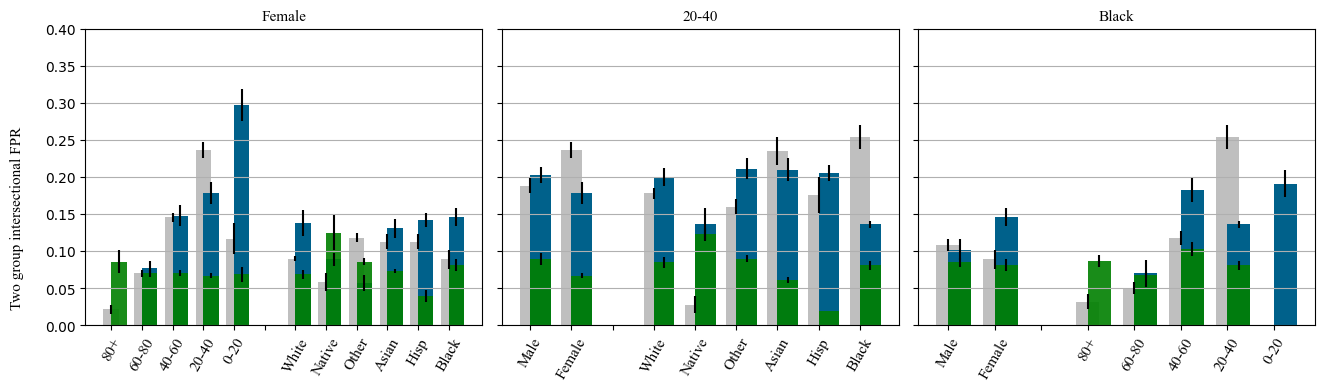

In [30]:

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6), sharey=True)
plt.rcdefaults()

# Plot Sex vs All Baseline
plot_fpr_data(axes,sex_groups, 0.5, 'Femal', 0)

#plot 20-40 vs all
plot_fpr_data(axes,age_groups, 0.5, '20-40',1)

#plot Black vs all
plot_fpr_data(axes,race_groups, 0.5, 'Black',2)

# Finalize the plot
# axes[0].set_ylabel('Two group intersectional FPR')

fig.suptitle('Two group intersectional FPR', rotation=90, x=-0.01, y=0.45,
             fontsize=fontsize,fontname=font_name)
i=0
for ax in axes:
  labels =sex_groups
  
  if i==0:
    ax.set_title("Female",fontsize = fontsize,fontname=font_name)
    
  elif i==1:
    labels =['Male', 'Female','', 'White', 'Native', 'Other', 'Asian', 'Hisp', 'Black']
    ax.set_title("20-40",fontsize = fontsize,fontname=font_name)
    
  else:
    labels =['Male', 'Female','','80+', '60-80', '40-60', '20-40','0-20']
    ax.set_title("Black",fontsize = fontsize,fontname=font_name)
  
  label_positions = np.arange(len(labels))
  
  ax.set_ylim(top=0.4)
  ax.yaxis.grid(True)
  ax.set_xticks(label_positions)
  ax.set_xticklabels(labels, fontsize = fontsize,  rotation=60,fontname=font_name)
  
  i+=1
  
plt.tight_layout()
#plt.show()
plt.savefig('./Twogroup_FPR_Chexpert_BiomedClip.pdf',bbox_inches='tight')
